In [0]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as  pd

SyntaxError: ignored

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [0]:
csv_file = pd.read_csv("/content/gdrive/My Drive/fer2013.csv")

In [0]:
len(csv_file)

In [0]:
len(csv_file.loc[csv_file['pixels'] != 1])

In [0]:
csv_file = csv_file.loc[csv_file['emotion'] != 1]
faces = csv_file['pixels'].tolist()
emotions = csv_file['emotion'].tolist()

In [0]:
for i in range(len(emotions)):
  if emotions[i] != 0:
    emotions[i] -= 1

In [0]:
for i in range(len(faces)):
  faces[i] = np.array(faces[i].split()).reshape(48, 48).astype('float32')
  


In [0]:
faces = np.array(faces)
emotions = np.array(emotions)

In [0]:
len(faces)

35340

In [0]:
X = faces
y = emotions

In [0]:
len(emotions)

35340

In [0]:
mypath = "gdrive/My Drive/jaffe"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))][1:]

In [0]:
len(onlyfiles)

214

In [0]:
onlyfiles.remove('README')

In [0]:
onlyfiles = np.array(onlyfiles)

In [0]:
imotions = {'AN':0, 'FE':1, 'HA':2, 'SA':3,
                'SU':4, 'NE':5}

In [0]:
X = []
y = []
np.random.shuffle(onlyfiles)
for i in onlyfiles:
    img = cv2.imread(mypath + '/' + i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dim = (160, 160)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    X.append(img)
    y.append(imotions[i[3:5]])

In [0]:
mypath1 = "gdrive/My Drive/owndata"

In [0]:
onlyfiles1 = np.array([f for f in listdir(mypath1) if isfile(join(mypath1, f))])

In [0]:
np.random.shuffle(onlyfiles1)
for i in onlyfiles1:
    img = cv2.imread(mypath1 + '/' + i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dim = (160, 160)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    X.append(img)
    y.append(int(i[0]) - 1)
    
dataset = np.array(X)
y = np.array(y)

In [0]:
len(X)

35340

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10)
X_train1, X_test1, y_train1, y_test1 = X_train, X_test, y_train, y_test

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [0]:
def convert_dtype(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_float: numpy array, dtype of elements changed to 'float32'
    """
    # YOUR CODE HERE
    x_float = x.astype('float32')
    return x_float

X_train = convert_dtype(X_train)
X_test = convert_dtype(X_test)

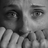

1


In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_test1[5])
print(y_test1[5])

In [0]:
def normalize(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_n: numpy array, elements normalized to be between (0, 1)
    """    
    # YOUR CODE HERE
    x_n = (x - 0)/(255)
    return x_n
    
X_train = normalize(X_train)
X_test = normalize(X_test) 


In [0]:
def reshape(x):
    """
    We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras
    Inputs:
        x: numpy array of shape(samples, height, width)
    Outputs:
        x_r: numpy array of shape(samples, height, width, 1)
    """
    # YOUR CODE HERE
    x_r = x.reshape((x.shape[0], x.shape[1], x.shape[2], 1))
    return x_r

X_train = reshape(X_train)
X_test = reshape(X_test) 

In [0]:
def oneHot(y, Ny):
    """
    Inputs:
        y: numpy array if shape (samples, ) with class labels
        Ny: number of classes
    Outputs:
        y_oh: numpy array of shape (samples, Ny) of one hot vectors
    """
    # YOUR CODE HERE
    y_oh = np.zeros((len(y), Ny))
    for i in range(len(y)):
      y_oh[i][y[i]] = 1
    return y_oh

# example
y_train = oneHot(y_train, 6)
y_test = oneHot(y_test, 6)

In [0]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2


def create_model():
    """
    Inputs:
        None
    Outputs:
        model: compiled keras model
    """
    # YOUR CODE HERE
    def mini_XCEPTION(input_shape, num_classes, l2_regularization=0.01):
        regularization = l2(l2_regularization)

        # base
        img_input = Input(input_shape)
        x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                   use_bias=False)(img_input)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                   use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        # module 1
        residual = Conv2D(16, (1, 1), strides=(2, 2),
                          padding='same', use_bias=False)(x)
        residual = BatchNormalization()(residual)

        x = SeparableConv2D(16, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = SeparableConv2D(16, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
        x = layers.add([x, residual])

        # module 2
        residual = Conv2D(32, (1, 1), strides=(2, 2),
                          padding='same', use_bias=False)(x)
        residual = BatchNormalization()(residual)

        x = SeparableConv2D(32, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = SeparableConv2D(32, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
        x = layers.add([x, residual])

        # module 3
        residual = Conv2D(64, (1, 1), strides=(2, 2),
                          padding='same', use_bias=False)(x)
        residual = BatchNormalization()(residual)

        x = SeparableConv2D(64, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = SeparableConv2D(64, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
        x = layers.add([x, residual])

        # module 4
        residual = Conv2D(128, (1, 1), strides=(2, 2),
                          padding='same', use_bias=False)(x)
        residual = BatchNormalization()(residual)

        x = SeparableConv2D(128, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = SeparableConv2D(128, (3, 3), padding='same',
                            kernel_regularizer=regularization,
                            use_bias=False)(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
        x = layers.add([x, residual])

        x = Conv2D(num_classes, (3, 3),
                   # kernel_regularizer=regularization,
                   padding='same')(x)
        x = GlobalAveragePooling2D()(x)
        output = Activation('softmax', name='predictions')(x)

        model = Model(img_input, output)
        return model
    model = mini_XCEPTION((48, 48, 1), 6)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

model = create_model()

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 46, 46, 8)    72          input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_57 (BatchNo (None, 46, 46, 8)    32          conv2d_29[0][0]                  
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 46, 46, 8)    0           batch_normalization_57[0][0]     
__________________________________________________________________________________________________
conv2d_30 

In [0]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=20, batch_size=200)

Train on 28625 samples, validate on 3181 samples
Epoch 1/20
28625/28625 [==============================] - 278s 10ms/step - loss: 0.9845 - acc: 0.6358 - val_loss: 1.9543 - val_acc: 0.4637
Epoch 2/20
28625/28625 [==============================] - 278s 10ms/step - loss: 0.9507 - acc: 0.6471 - val_loss: 1.8267 - val_acc: 0.3989
Epoch 3/20
28625/28625 [==============================] - 277s 10ms/step - loss: 0.9230 - acc: 0.6643 - val_loss: 1.5575 - val_acc: 0.5039
Epoch 4/20
28625/28625 [==============================] - 276s 10ms/step - loss: 0.8857 - acc: 0.6756 - val_loss: 1.5228 - val_acc: 0.4942
Epoch 5/20
28625/28625 [==============================] - 277s 10ms/step - loss: 0.8669 - acc: 0.6787 - val_loss: 1.5378 - val_acc: 0.5156
Epoch 6/20
28625/28625 [==============================] - 276s 10ms/step - loss: 0.8334 - acc: 0.6988 - val_loss: 1.9191 - val_acc: 0.4467
Epoch 7/20
28625/28625 [==============================] - 276s 10ms/step - loss: 0.8128 - acc: 0.7028 - val_loss: 1.9

In [0]:
def predict(x):
    """
    Inputs:
        x: input samples
        model: keras model
    Outputs:
        y: predicted labels
    """
    # YOUR CODE HERE
    y = model.predict(x)
    y1 = np.zeros(y.shape)
    for i in range(len(y)):
      y1[i][np.argmax(y[i])] = 1
    y = y1
    return y

In [0]:
def oneHot_tolabel(y):
    """
    Inputs:
        y: numpy array of shape (samples, Ny)
    Outputs:
        y_b: numpy array of shape (samples,) where one hot encoding is converted back to class labels
    """
    # YOUR CODE HERE
    y_b = []
    for i in range(len(y)):
      y_b.append(np.argmax(y[i]))
      
    y_b = np.array(y_b)
    return y_b
    

In [0]:
def create_confusion_matrix(true_labels, predicted_labels):
    """
    Inputs:
        true_labels: numpy array of shape (samples, ) with true_labels
        test_labels: numpy array of shape(samples, ) with test_labels
    Outputs:
        cm: numpy array of shape (Ny, Ny), confusion matrix. Ny -> number of unique classes in y
    """
    # YOUR CODE HERE
    cm = np.zeros((7, 7))
    for i in range(len(true_labels)):
      if true_labels[i] == predicted_labels[i]:
        cm[true_labels[i]][true_labels[i]] = cm[true_labels[i]][true_labels[i]] + 1
      elif true_labels[i] != predicted_labels[i]:
        cm[true_labels[i]][predicted_labels[i]] += 1
    return cm

In [0]:
predicted_labels_train = predict(X_train)

In [0]:
oneHot_tolabel(predicted_labels_train)

array([4, 5, 5, ..., 4, 5, 4])

In [0]:
len(predicted_labels_train)

31806

In [0]:
cm = create_confusion_matrix(oneHot_tolabel(y_train), oneHot_tolabel(predict(X_train))).astype(int)

In [0]:
print(cm)

[[1876  216    6   44 1651  696    0]
 [ 289 1129    8   89 2457  628    0]
 [ 500  297 1934   71 3615 1687    0]
 [ 440  506   17  737 2140 1647    0]
 [  18   13    3    4 3466   51    0]
 [ 233  165   10   59 1798 3306    0]
 [   0    0    0    0    0    0    0]]


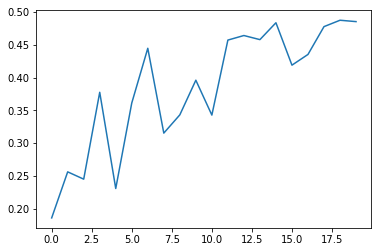

In [0]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])
plt.show()

In [0]:
def accuracy(x_test, y_test, model):
    """
    Inputs:
        x_test: test samples
        y_test : test labels
        model: keras model
    Ouputs:
        acc: float, accuracy of test data on model
    """
    # YOUR CODE HERE
    acc = model.evaluate(x_test, y_test)[1]
    return acc

acc = accuracy(X_test, y_test, model)
print('Test accuracy is, ', acc*100, '%')

127/127 [==============================] - 1s 5ms/step
Test accuracy is,  40.94488160816703 %


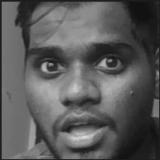

In [0]:
i = 7
from google.colab.patches import cv2_imshow
cv2_imshow(X_test1[i])

In [0]:
pr = predict(np.array(X_test))

In [0]:
oneHot_tolabel(pr) == oneHot_tolabel(y_test)

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False,  True,
        True])

In [0]:
oneHot_tolabel(y_test)